In [2]:
import os 
from PIL import Image
import numpy as np
dir = "../NWPU-RESISC45"
lables = os.listdir(dir)
imgs = []
img_lables = []
for i, lable in enumerate(lables):
    print("running ", lable)
    for img_name in os.listdir(f"{dir}/{lable}"):
        img = Image.open(f"{dir}/{lable}/{img_name}").convert("L")
        img = img.resize((128,128),Image.Resampling.LANCZOS)
        np_img = np.asanyarray(img)

        imgs.append(np_img)
        img_lables.append(lable)

running  airplane
running  airport
running  baseball_diamond
running  basketball_court
running  beach
running  bridge
running  chaparral
running  church
running  circular_farmland
running  cloud
running  commercial_area
running  dense_residential
running  desert
running  forest
running  freeway
running  golf_course
running  ground_track_field
running  harbor
running  industrial_area
running  intersection
running  island
running  lake
running  meadow
running  medium_residential
running  mobile_home_park
running  mountain
running  overpass
running  palace
running  parking_lot
running  railway
running  railway_station
running  rectangular_farmland
running  river
running  roundabout
running  runway
running  sea_ice
running  ship
running  snowberg
running  sparse_residential
running  stadium
running  storage_tank
running  tennis_court
running  terrace
running  thermal_power_station
running  wetland


In [5]:
imgs_t = np.asanyarray(imgs, np.uint8)
img_lables_t = np.asanyarray(img_lables)
np.save('../numpy_data/imgs_t',imgs_t) 
np.save('../numpy_data/img_lables_t',img_lables_t)

In [6]:
import os 
import numpy as np

dir = "../NWPU-RESISC45"
lables = os.listdir(dir)

imgs_t = np.load('../numpy_data/imgs_t.npy')
img_lables_t = np.load('../numpy_data/img_lables_t.npy')
imgs_t.shape


(31500, 128, 128)

In [7]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
imgs, img_lables = unison_shuffled_copies(imgs_t, img_lables_t)

del imgs_t
del img_lables_t


In [8]:
dataset_usage = 1
indx = int(len(imgs)*dataset_usage)
imgs = np.asanyarray(imgs[:indx])
img_lables = np.asanyarray(img_lables[:indx])

ground_track_field


(31500, 128, 128)

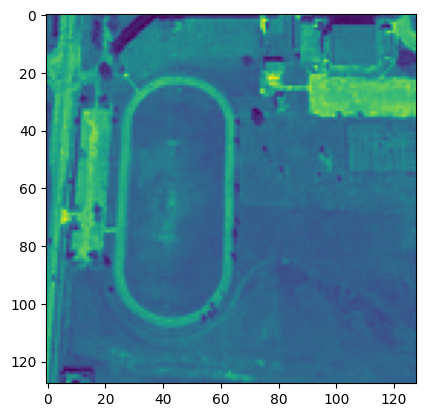

In [9]:
import matplotlib.pyplot as plt
import random
ind = random.randint(0, 100)
plt.imshow(imgs[ind])
print(img_lables[ind])
imgs.shape


In [5]:
test_split = 0.2
split_indx = int(imgs.shape[0]*test_split)

test_img, training_img = imgs[:split_indx,:], imgs[split_indx:,:]
test_img_lables, training_img_lables = img_lables[:split_indx], img_lables[split_indx:]

print(test_img.shape[0], training_img.shape[0])
test_img.shape


6300 25200


(6300, 128, 128)

In [6]:
training_img = training_img.astype('float16') / 255
test_img = test_img.astype('float16') / 255
#test_img = test_img.reshape((test_img.shape[0],512*512))

In [7]:
test_img_lables = [lables.index(i)for i in test_img_lables]
training_img_lables = [lables.index(i)for i in training_img_lables]

In [8]:
from tensorflow.keras.utils import to_categorical

test_img_lables = to_categorical(test_img_lables)
training_img_lables = to_categorical(training_img_lables)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers


model = models.Sequential()


model.add(layers.Flatten(input_shape=(128,128, 1)))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(45, activation = 'softmax'))
#model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
#                loss='categorical_crossentropy',
#                metrics=['accuracy'])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 1024)              16778240  
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 45)                11565     
                                                                 
Total params: 17,117,997
Trainable params: 17,117,997
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(training_img, training_img_lables, epochs=30, validation_split=0.1)
#print(model.evaluate(test_img,test_img_lables))

Epoch 1/30
709/709 [==============================] - 7s 7ms/step - loss: 4.2369 - accuracy: 0.0264 - val_loss: 3.7571 - val_accuracy: 0.0310
Epoch 2/30
709/709 [==============================] - 5s 7ms/step - loss: 3.6810 - accuracy: 0.0615 - val_loss: 3.5898 - val_accuracy: 0.0754
Epoch 3/30
709/709 [==============================] - 5s 7ms/step - loss: 3.5207 - accuracy: 0.0872 - val_loss: 3.4860 - val_accuracy: 0.0881
Epoch 4/30
709/709 [==============================] - 5s 7ms/step - loss: 3.4104 - accuracy: 0.1094 - val_loss: 3.3449 - val_accuracy: 0.1171
Epoch 5/30
709/709 [==============================] - 5s 7ms/step - loss: 3.3620 - accuracy: 0.1168 - val_loss: 3.3993 - val_accuracy: 0.0980
Epoch 6/30
709/709 [==============================] - 5s 7ms/step - loss: 3.3382 - accuracy: 0.1224 - val_loss: 3.3911 - val_accuracy: 0.1032
Epoch 7/30
709/709 [==============================] - 5s 7ms/step - loss: 3.3146 - accuracy: 0.1271 - val_loss: 3.3483 - val_accuracy: 0.1242
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


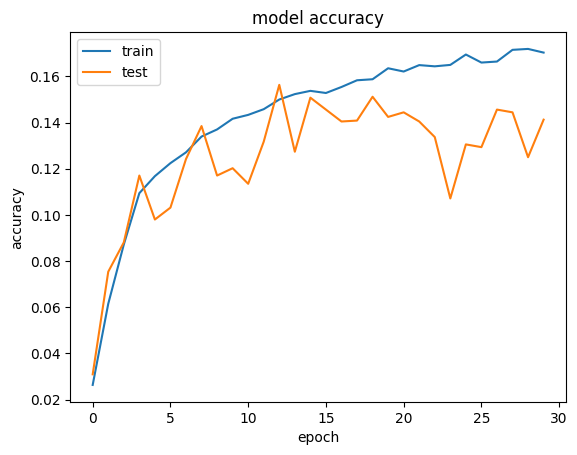

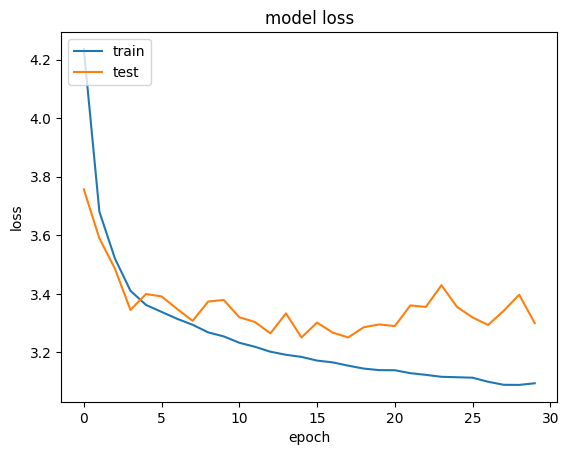

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 79ms/step
model says:  meadow
unser:  river


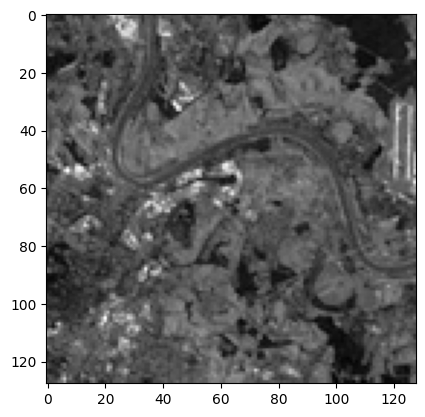

In [12]:
ind = random.randint(0,1000)

img = np.asarray([test_img[ind]])
prediction = model.predict([img])[0]
pred_ind = np.where(prediction == prediction.max())
print("model says: ", lables[pred_ind[0][0]])

text = test_img_lables[ind]
text_ind = np.where(text == 1)
print("unser: ", lables[text_ind[0][0]])

plt.imshow(255 - np.int16(img[0]*255), cmap="Greys")


In [13]:
path='../weights/weights_p.h5'
 
# save
# model.save_weights(path)